Add parts of XED to TDT to improve performance on predicting TDT data. No method was found to be succesful.

In [1]:
# Set the file paths here
tdt_train_fn = '/content/tdt-sentiment-151020-train-clean.tsv'
tdt_eval_fn = '/content/tdt-sentiment-151020-dev.tsv'
xed_nonneutrals_fn = '/content/fi-annotated.tsv'
xed_neutrals_fn = '/content/neu_fi.txt'

In [ ]:
!pip install transformers

In [3]:
# Choose model and set up input

from sklearn.preprocessing import LabelEncoder
from transformers import BertTokenizerFast
import tensorflow as tf

def transpose(l):
  return [list(t) for t in zip(*l)]

def load_fields(fn):
  return transpose([l.rstrip('\n').split('\t') for l in open(fn).readlines()])

tdt_train_texts, tdt_train_labels_raw = load_fields(tdt_train_fn)[1:3]
tdt_eval_texts, tdt_eval_labels_raw = load_fields(tdt_eval_fn)[1:3]

neutral_texts = load_fields(xed_neutrals_fn)[1]
neutral_labels_raw = ['neutral' for _ in neutral_texts]
nonneutral_texts, nonneutral_labels_raw = load_fields(xed_nonneutrals_fn)[:2]

tdt_train_labels_binary = [1 if s == 'neutral' else 0 for s in tdt_train_labels_raw]
tdt_eval_labels_binary = [1 if s == 'neutral' else 0 for s in tdt_eval_labels_raw]

#model_name = "TurkuNLP/bert-base-finnish-cased-v1"
model_name = "TurkuNLP/bert-base-finnish-uncased-v1"

tokenizer = BertTokenizerFast.from_pretrained(model_name)

input_size = 128

eval_encodings = tokenizer(tdt_eval_texts, truncation=True, padding='longest', max_length=input_size)

In [4]:
# Set up training
from transformers import TFBertForSequenceClassification, optimization_tf
from math import inf

e = [tf.constant(eval_encodings.data['input_ids']),
     tf.constant(eval_encodings.data['attention_mask']),
     tf.constant(eval_encodings.data['token_type_ids'])]

init_lr = 2e-5

epochs = 2
batch_size_train = 16
batch_size_eval = 16

def train(model, t, train_labels, eval):
  size_train = len(train_labels)
  steps_per_epoch = int(size_train/batch_size_train)
  steps_train = steps_per_epoch*epochs
  steps_warmup = int(epochs * size_train * 0.1 / batch_size_train)
  optimizer, _ = optimization_tf.create_optimizer(init_lr=init_lr,
                                                  num_train_steps=steps_train,
                                                  num_warmup_steps=steps_warmup,
                                                  weight_decay_rate=0.01)
  model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['sparse_categorical_accuracy'])
  history = model.fit(t,
                      train_labels,
                      validation_data=eval,
                      batch_size=batch_size_train,
                      epochs=epochs,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_sparse_categorical_accuracy', patience=inf, restore_best_weights=True)])
  return model

All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-uncased-v1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Epoch 1/2


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


984/984 [==============================] - ETA: 0s - loss: 0.4013 - sparse_categorical_accuracy: 0.8077

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


984/984 [==============================] - 291s 280ms/step - loss: 0.4012 - sparse_categorical_accuracy: 0.8077 - val_loss: 0.2948 - val_sparse_categorical_accuracy: 0.8594
Epoch 2/2
984/984 [==============================] - 272s 277ms/step - loss: 0.1371 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.3049 - val_sparse_categorical_accuracy: 0.8747


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-uncased-v1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in g

Epoch 1/2


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


984/984 [==============================] - ETA: 0s - loss: 0.4141 - sparse_categorical_accuracy: 0.7973

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


984/984 [==============================] - 290s 278ms/step - loss: 0.4140 - sparse_categorical_accuracy: 0.7974 - val_loss: 0.2886 - val_sparse_categorical_accuracy: 0.8679
Epoch 2/2
984/984 [==============================] - 271s 275ms/step - loss: 0.1459 - sparse_categorical_accuracy: 0.9466 - val_loss: 0.3347 - val_sparse_categorical_accuracy: 0.8688


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.
All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at TurkuNLP/bert-base-finnish-uncased-v1 and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in g

Epoch 1/2


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


984/984 [==============================] - ETA: 0s - loss: 0.4375 - sparse_categorical_accuracy: 0.7676

The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


984/984 [==============================] - 289s 278ms/step - loss: 0.4374 - sparse_categorical_accuracy: 0.7677 - val_loss: 0.2741 - val_sparse_categorical_accuracy: 0.8772
Epoch 2/2
984/984 [==============================] - 271s 276ms/step - loss: 0.1390 - sparse_categorical_accuracy: 0.9467 - val_loss: 0.3096 - val_sparse_categorical_accuracy: 0.8755


The parameters `output_attentions`, `output_hidden_states` and `use_cache` cannot be updated when calling a model.They have to be set to True/False in the config object (i.e.: `config=XConfig.from_pretrained('name', output_attentions=True)`).
The parameter `return_dict` cannot be set in graph mode and will always be set to `True`.


Model: TurkuNLP/bert-base-finnish-uncased-v1, initial learning rate = 2e-05, input size = 128, batch size = 16, epochs = 2

Statistics for TDT with Disgust and Joy from XED
Accuracy:  0.8747
Weighted F-score:  0.8764
ROC AUC:  0.9453
Average accuracy: 0.8747, standard deviation: 0.0000
Average weighted F-score: 0.8764, standard deviation: 0.0000
Average ROC AUC: 0.9453, standard deviation: 0.0000

Statistics for TDT with random sample from XED
Accuracy:  0.8688
Weighted F-score:  0.8700
ROC AUC:  0.9363
Average accuracy: 0.8688, standard deviation: 0.0000
Average weighted F-score: 0.8700, standard deviation: 0.0000
Average ROC AUC: 0.9363, standard deviation: 0.0000

Statistics for TDT with longest sentences from XED
Accuracy:  0.8755
Weighted F-score:  0.8763
ROC AUC:  0.9422
Average accuracy: 0.8755, standard deviation: 0.0000
Average weighted F-score: 0.8763, standard deviation: 0.0000
Average ROC AUC: 0.9422, standard deviation: 0.0000



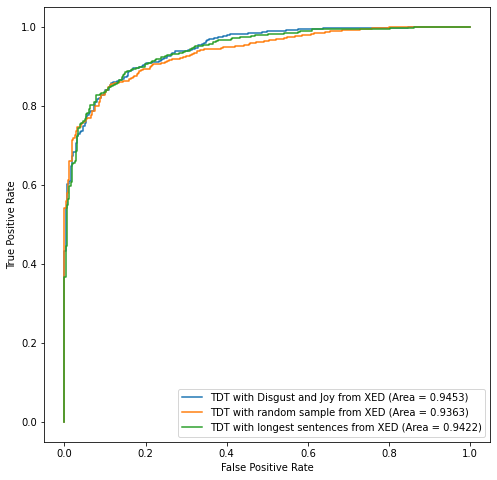

In [6]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
from sklearn.utils.extmath import softmax

d = defaultdict(list)
for text, label_list in zip(nonneutral_texts, nonneutral_labels_raw):
  for label in label_list.split(','):
    d[int(label)].append(text)

# class_names = ['anger', 'anticipation', 'disgust', 'fear', 'joy', 'sadness', 'surprise', 'trust']
train_texts = tdt_train_texts + d[3] + d[5]
added_length = len(d[3]) + len(d[5])
train_labels = tdt_train_labels_binary + [0]*added_length

random.seed(1234)
train_texts_random = tdt_train_texts + random.sample(nonneutral_texts, added_length)

sorted_nonneutral = [s for s, _ in sorted(zip(nonneutral_texts, [len(t) for t in tokenizer(nonneutral_texts)['input_ids']]), key=lambda x: x[1])]
train_texts_longest = tdt_train_texts + sorted_nonneutral[-added_length:]

train_encodings = tokenizer(train_texts, truncation=True, padding='longest', max_length=input_size)
train_encodings_random = tokenizer(train_texts_random, truncation=True, padding='longest', max_length=input_size)
train_encodings_longest = tokenizer(train_texts_longest, truncation=True, padding='longest', max_length=input_size)

t_disgust_joy = [tf.constant(train_encodings.data['input_ids']),
                 tf.constant(train_encodings.data['attention_mask']),
                 tf.constant(train_encodings.data['token_type_ids'])]

t_random = [tf.constant(train_encodings_random.data['input_ids']),
            tf.constant(train_encodings_random.data['attention_mask']),
            tf.constant(train_encodings_random.data['token_type_ids'])]

t_longest = [tf.constant(train_encodings_longest.data['input_ids']),
             tf.constant(train_encodings_longest.data['attention_mask']),
             tf.constant(train_encodings_longest.data['token_type_ids'])]

def train_evaluate(train_x, train_y, eval_x, eval_y, run_count):
  num_labels = 2
  runs = []
  for i in range(run_count):
    bert = TFBertForSequenceClassification.from_pretrained(model_name,
                                                          num_labels=num_labels)
    bert = train(bert, train_x, train_y, (eval_x, eval_y))
    runs.append(bert.predict(eval_x)[0])
  return runs

train_lists = [(t_disgust_joy, tf.constant(train_labels), 'TDT with Disgust and Joy from XED'),
               (t_random, tf.constant(train_labels), 'TDT with random sample from XED'),
               (t_longest, tf.constant(train_labels), 'TDT with longest sentences from XED')]

eval_binary = tf.constant(tdt_eval_labels_binary)

run_lists = [(train_evaluate(train_x, train_y, e, eval_binary, 3), name) for (train_x, train_y, name) in train_lists]

plt.figure(figsize=(8, 8))

def format_floats(l):
  return ', '.join(f'{x:.4f}' for x in l)

print(f"Model: {model_name}, initial learning rate = {init_lr}, input size = {input_size}, batch size = {batch_size_train}, epochs = {epochs}\n")

for preds, name in run_lists:
  accuracy = [accuracy_score(eval_binary, p.argmax(-1)) for p in preds]
  weighted_f1 = [f1_score(eval_binary, p.argmax(-1), average='weighted') for p in preds]
  roc = [roc_curve(eval_binary, softmax(p)[:,1]) for p in preds]
  aucs = [auc(fpr, tpr) for fpr, tpr, _ in roc]
  max_i = aucs.index(max(aucs))
  print(f'Statistics for {name}')
  print('Accuracy: ', format_floats(accuracy))
  print('Weighted F-score: ', format_floats(weighted_f1))
  print('ROC AUC: ', format_floats(aucs))
  print(f'Average accuracy: {np.mean(accuracy):.4f}, standard deviation: {np.std(accuracy):.4f}')
  print(f'Average weighted F-score: {np.mean(weighted_f1):.4f}, standard deviation: {np.std(weighted_f1):.4f}')
  print(f'Average ROC AUC: {np.mean(aucs):.4f}, standard deviation: {np.std(aucs):.4f}')
  print()
  fpr, tpr, _ = roc[max_i]
  plt.plot(fpr, tpr, label=f'{name} (Area = {aucs[max_i]:.4f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()